In [36]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import statsmodels.api as sm

In [37]:
gdf = gpd.read_file(r"G:\My Drive\Investigacion2025\Posgrado_Statistics\GeoAnalysis\data\Balso_Municipios.gpkg")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   dpto_cnmbr                               1121 non-null   object  
 1   mpio_cnmbr                               1121 non-null   object  
 2   mpio_narea                               1121 non-null   float64 
 3   NUMPOINTS                                1121 non-null   float64 
 4   elev_mean                                1121 non-null   float64 
 5   Temperatura_media_anual_mean             1121 non-null   float64 
 6   Precipitacion_anual_mean                 1121 non-null   float64 
 7   Rango_medio_diurno_mean                  1121 non-null   float64 
 8   Precipitacion_mes_mas_lluvioso_mean      1121 non-null   float64 
 9   Precipitacion_mes_mas_seco_mean          1121 non-null   float64 
 10  Isotermalidad_mean          

In [38]:
gdf = gdf.rename(columns={'dpto_cnmbr': 'departamento', 
                    'mpio_cnmbr': 'municipio',
                    'mpio_narea': 'area',
                    'NUMPOINTS': 'conteo'})
gdf.head(3)

departamento  municipio        area  conteo  elev_mean  \
0    ANTIOQUIA   MEDELLÍN  374.834005    18.0    2030.00   
1    ANTIOQUIA  ABEJORRAL  507.141095     0.0    1963.75   
2    ANTIOQUIA   ABRIAQUÍ  296.894050     0.0    2375.80   

   Temperatura_media_anual_mean  Precipitacion_anual_mean  \
0                     18.157167               2487.400000   
1                     17.530000               2419.958333   
2                     15.494967               2391.933333   

   Rango_medio_diurno_mean  Precipitacion_mes_mas_lluvioso_mean  \
0                 9.573711                           335.133333   
1                 8.855028                           295.500000   
2                 8.703756                           329.600000   

   Precipitacion_mes_mas_seco_mean  Isotermalidad_mean  \
0                        94.466667           89.996162   
1                       102.708333           90.066731   
2                        69.400000           87.985126   

   Estacionalidad_de_la_temperatura_mean  Rango_anual_de_temperatura_mean  \
0                              37.960908                        10.638400   
1                              30.902316                         9.848834   
2                              33.218638                         9.897067   

   Estacionalidad_de_la_precipitacion_mean  \
0                                36.525846   
1                                31.626925   
2                                41.646924   

                                            geometry  
0  MULTIPOLYGON (((-75.66974 6.3736, -75.66965 6....  
1  MULTIPOLYGON (((-75.46938 5.94575, -75.46897 5...  
2  MULTIPOLYGON (((-76.08351 6.7505, -76.08325 6....

# Análisis descriptivo de la variable respuesta

In [4]:
gdf['conteo'].describe().round(2)

count    1121.00
mean        7.47
std       101.46
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2705.00
Name: conteo, dtype: float64

<Axes: ylabel='Density'>

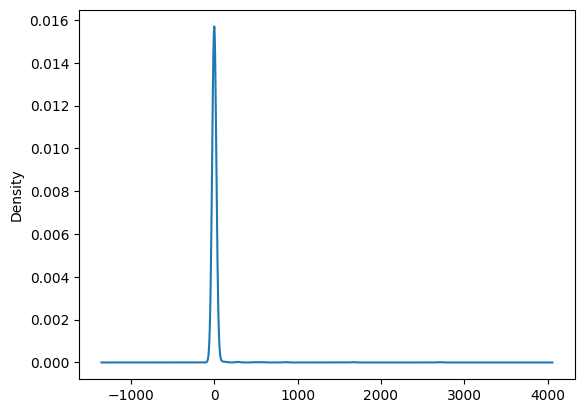

In [5]:
gdf['conteo'].plot(kind='density')

<Axes: ylabel='Frequency'>

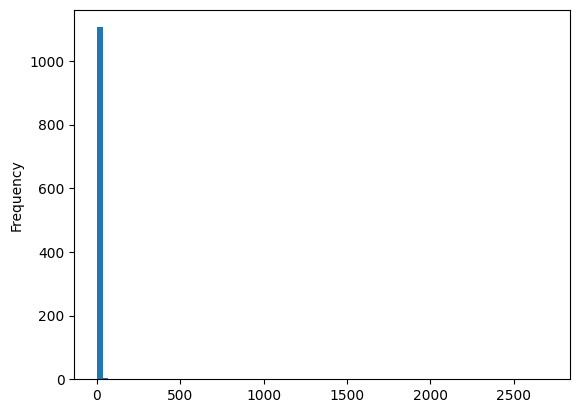

In [6]:
gdf['conteo'].plot(kind="hist", bins=80)

In [7]:
gdf['conteo'].astype(str).value_counts()

conteo
0.0       897
1.0        86
2.0        42
4.0        21
3.0        19
5.0         7
6.0         4
18.0        3
27.0        3
7.0         3
8.0         2
26.0        2
10.0        2
12.0        2
11.0        2
23.0        2
17.0        2
51.0        2
845.0       1
493.0       1
32.0        1
289.0       1
142.0       1
15.0        1
275.0       1
1660.0      1
2705.0      1
13.0        1
28.0        1
81.0        1
21.0        1
128.0       1
44.0        1
98.0        1
573.0       1
33.0        1
9.0         1
47.0        1
Name: count, dtype: int64

In [8]:
# Municipios con mayor conteo
gdf[['municipio', 'departamento', 'conteo']].sort_values(by='conteo', ascending=False)

municipio departamento  conteo
23                  BURITICÁ    ANTIOQUIA  2705.0
85               SABANALARGA    ANTIOQUIA  1660.0
66                  LIBORINA    ANTIOQUIA   845.0
918   SAN VICENTE DE CHUCURÍ    SANTANDER   573.0
59                   ITUANGO    ANTIOQUIA   493.0
...                      ...          ...     ...
29                  CARACOLÍ    ANTIOQUIA     0.0
1118            LA PRIMAVERA      VICHADA     0.0
1082              SAN MIGUEL     PUTUMAYO     0.0
7                ANGELÓPOLIS    ANTIOQUIA     0.0
5                     AMALFI    ANTIOQUIA     0.0

[1121 rows x 3 columns]

In [9]:
gdf['conteo'].unique().shape

(38,)

In [10]:
gdf.shape

(1121, 15)

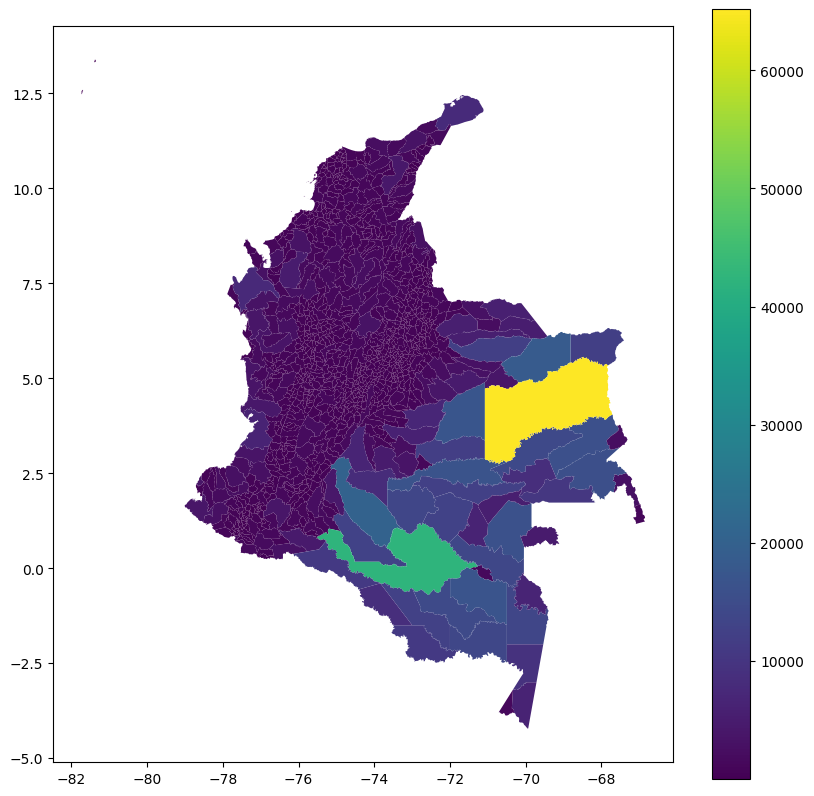

In [11]:
f, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='area', legend=True, ax=ax)
plt.show()

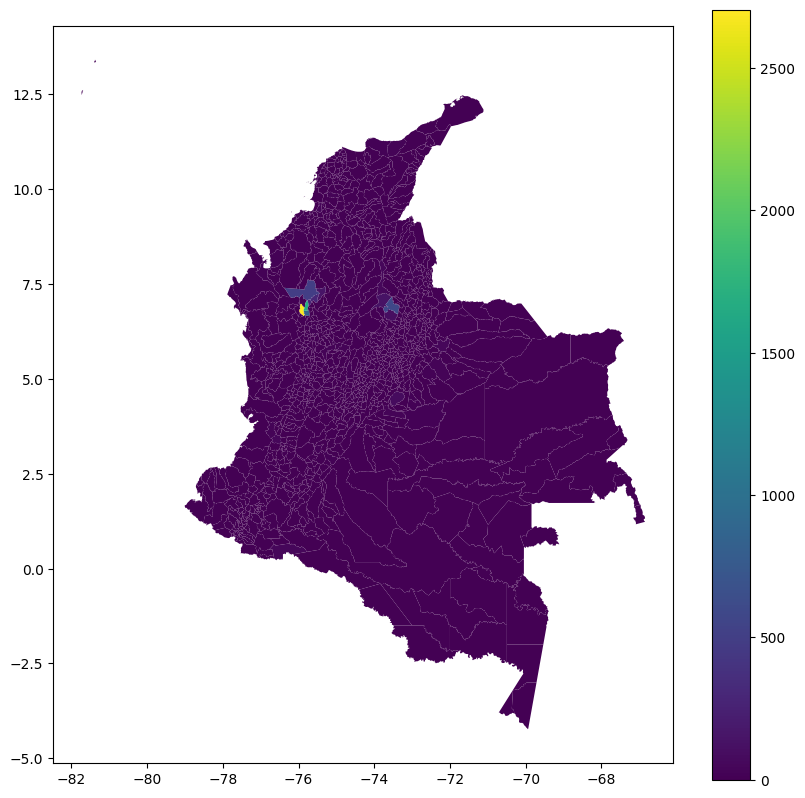

In [12]:
f, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='conteo', legend=True, ax=ax)
plt.show()

In [13]:
gdf.columns

Index(['departamento', 'municipio', 'area', 'conteo', 'elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean', 'geometry'],
      dtype='object')

# Distribución normal (Regresión lineal Gaussiana)

In [14]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Preparar datos
gdf["y_log"] = np.log(gdf['conteo'] + 1)
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']

# Escalar variables
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)
y = gdf['y_log']

# Entrenar el modelo de regresión lineal
model_ols = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_log   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     8.534
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.61e-13
Time:                        12:35:02   Log-Likelihood:                -1366.1
No. Observations:                1121   AIC:                             2754.
Df Residuals:                    1110   BIC:                             2810.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3129      0.025     12.738      0.0

In [15]:
# AIC modelo
model_ols.aic

np.float64(2754.2789405458243)

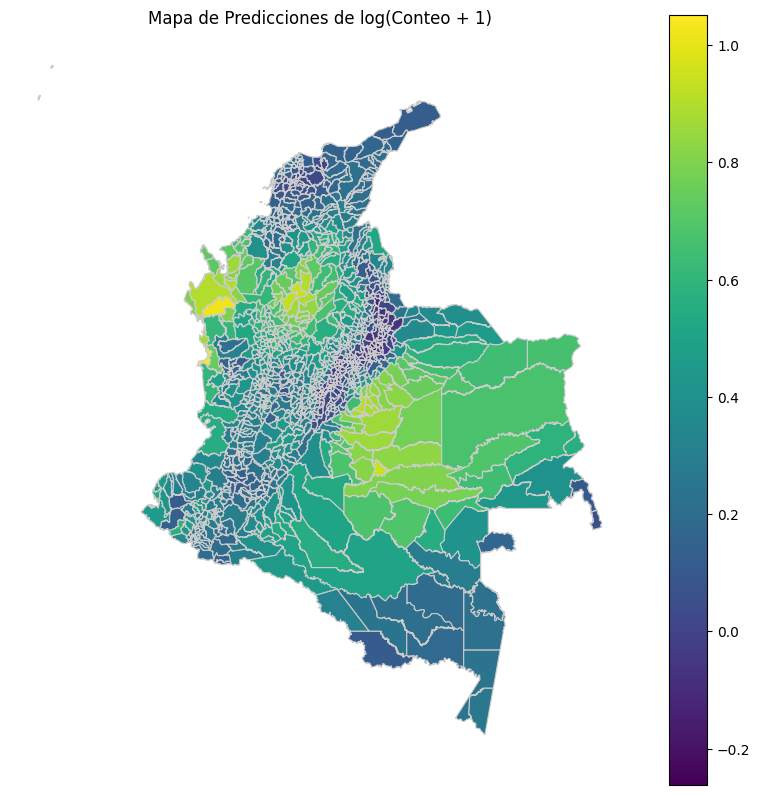

In [16]:
# Obtener las predicciones
y_pred = model_ols.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['y_pred'] = y_pred

# Graficar el mapa con los valores de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='y_pred', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de log(Conteo + 1)')
ax.set_axis_off()
plt.show()

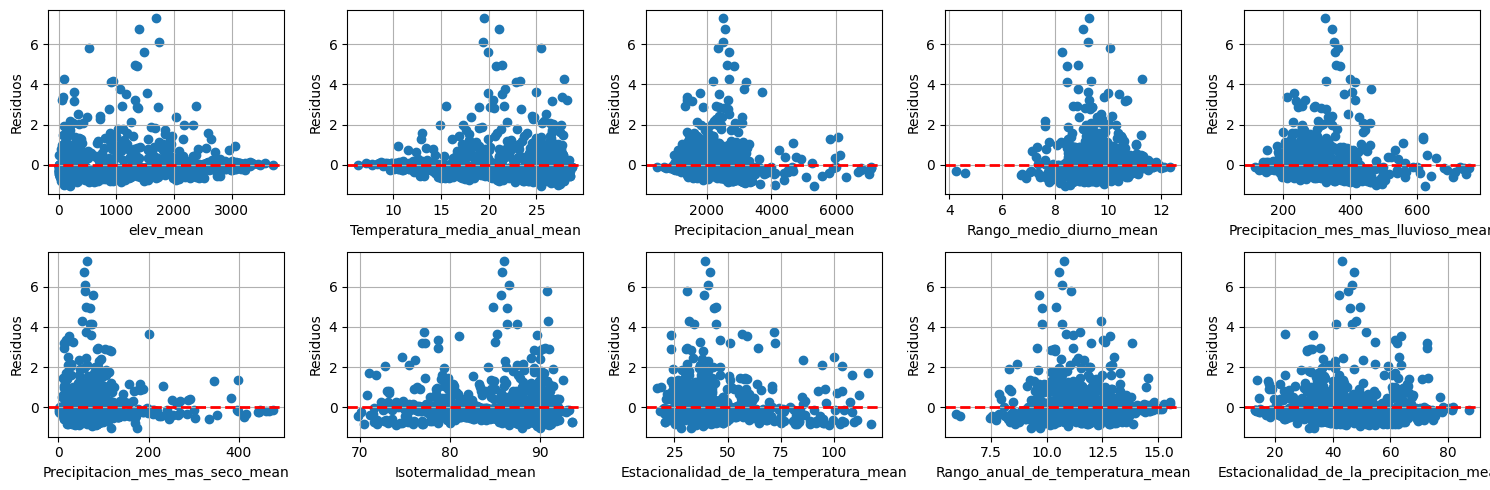

In [17]:
# Calcular los residuos
residuals = y - y_pred

# Crear las figuras scatter para comparar los residuos con cada variable X
plt.figure(figsize=(15, 5))

for i, variable in enumerate(var):
    plt.subplot(2, 5, i + 1)
    plt.scatter(gdf[variable], residuals)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.xlabel(variable)
    plt.ylabel('Residuos')
    #plt.title(f'Residuos vs. {variable}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Distribución binomial (para Regresión Logística)

In [18]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

# Preparar datos para regresión logística
gdf['evento'] = np.where(gdf['conteo'] >= 1, 1, 0)
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']
y = gdf['evento']

# Escalar variables independientes
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión logística
model_logit = sm.Logit(y, X).fit()

# Imprimir un resumen del modelo de regresión logística
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.447687
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 evento   No. Observations:                 1121
Model:                          Logit   Df Residuals:                     1110
Method:                           MLE   Df Model:                           10
Date:                Thu, 24 Jul 2025   Pseudo R-squ.:                  0.1049
Time:                        12:35:07   Log-Likelihood:                -501.86
converged:                       True   LL-Null:                       -560.67
Covariance Type:            nonrobust   LLR p-value:                 1.528e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6645      0.096    -17.252      0.000      -1.854      -1.475
x1             0.9970      0.

In [19]:
model_logit.aic


np.float64(1025.7145909737817)

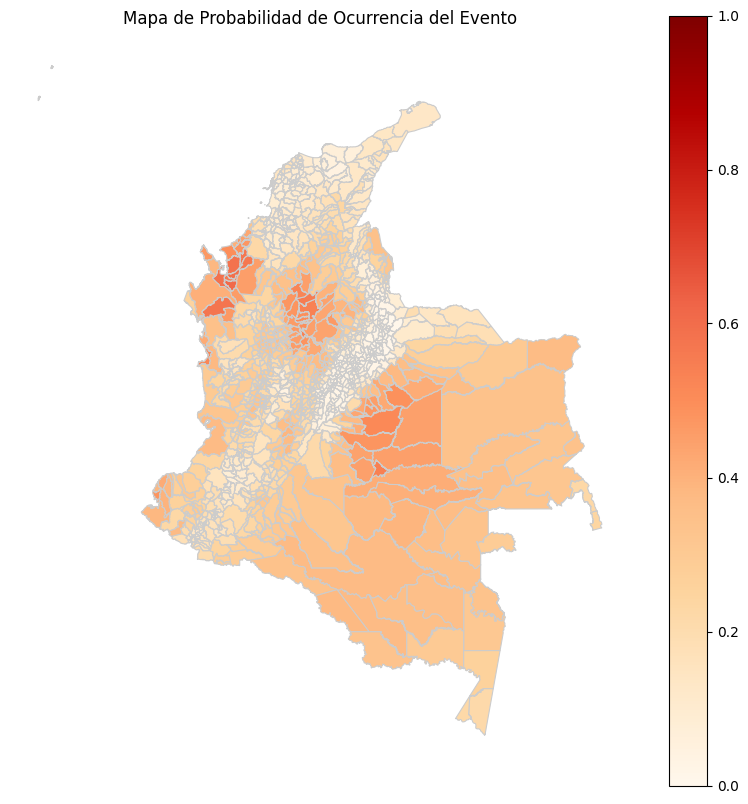

In [20]:
# Obtener las predicciones en términos de probabilidad
y_prob = model_logit.predict(X)

# Añadir las probabilidades de predicción al GeoDataFrame
gdf['probability_evento'] = y_prob

# Graficar el mapa con las probabilidades de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='probability_evento', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=0, vmax=1)
ax.set_title('Mapa de Probabilidad de Ocurrencia del Evento')
ax.set_axis_off()
plt.show()

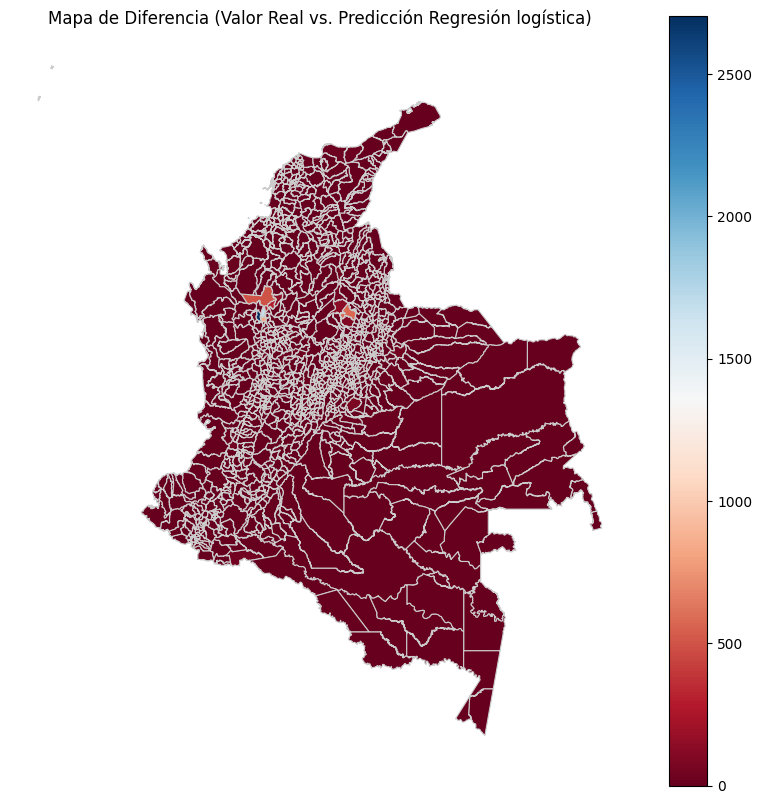

In [21]:
# Calcular la diferencia entre el valor real y la predicción (Regresión logística)
gdf['difference_lands_rec_logistico'] = gdf['conteo'] - gdf['probability_evento']

# Graficar el mapa con la diferencia entre el valor real y la predicción (Regresión logistica)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_lands_rec_logistico', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción Regresión logística)')
ax.set_axis_off()
plt.show()


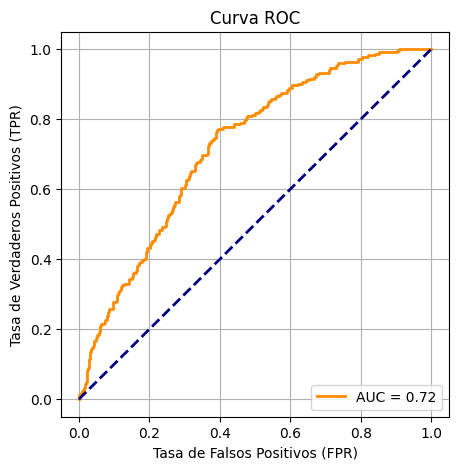

In [22]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Distribución de Poisson (para los modelos de regresión de Poisson)

In [23]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.preprocessing import StandardScaler

# Preparar datos para regresión de Poisson con offset por área
y = gdf['conteo']
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']  # No incluimos 'area' como predictor directamente ahora
#exposure = np.log(gdf['area'])  # Logaritmo del área como medida de exposición

# Escalar variables independientes (excepto el área que se usa como offset)
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión de Poisson
poisson_model = GLM(y, X, family=families.Poisson()).fit()

# Entrenar el modelo de regresión de Poisson con offset
#poisson_model_offset = GLM(y, X, family=families.Poisson(), offset=exposure).fit()

# Imprimir un resumen del modelo de regresión de Poisson con offset
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 conteo   No. Observations:                 1121
Model:                            GLM   Df Residuals:                     1110
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23504.
Date:                Thu, 24 Jul 2025   Deviance:                       46317.
Time:                        12:35:15   Pearson chi2:                 4.60e+07
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4601      0.039    -11.745      0.0

In [24]:
# AIC del modelo de regresión de Poisson
poisson_model.aic

np.float64(47030.7901444453)

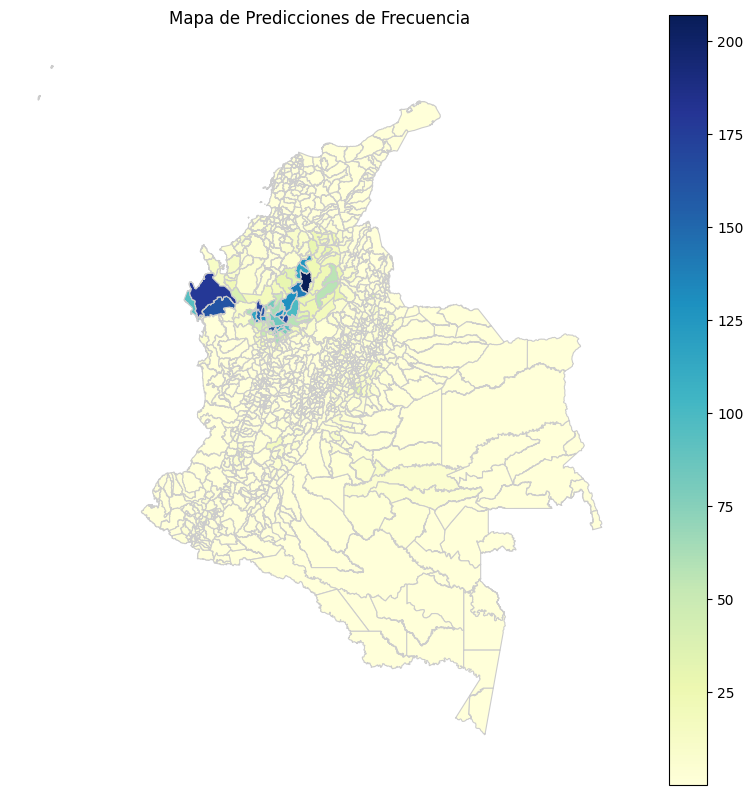

In [25]:
# Obtener las predicciones de frecuencia (ahora representan la frecuencia ajustada por el área)
y_pred_freq = poisson_model.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['predicted_lands_rec'] = y_pred_freq

# Calcular la diferencia entre el valor real y la predicción con offset
gdf['difference_lands_rec'] = gdf['conteo'] - gdf['predicted_lands_rec']

# Graficar el mapa con los valores de predicción de frecuencia ajustados por área
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_lands_rec', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de Frecuencia')
ax.set_axis_off()
plt.show()

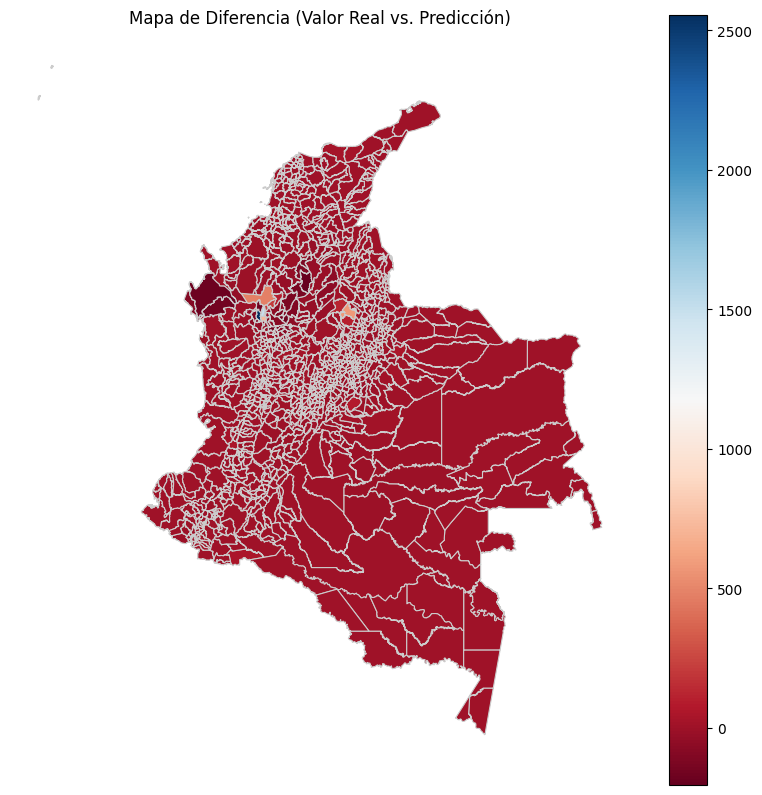

In [26]:
# Graficar el mapa con la diferencia entre el valor real y la predicción ajustada por área
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_lands_rec', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción)')
ax.set_axis_off()
plt.show()

# Distribución Binomial Negativa (para modelos de regresión binomial negativa)


In [27]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.preprocessing import StandardScaler

# Preparar datos para regresión binomial negativa con offset por área
y = gdf['conteo']
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']   # No incluimos 'area' como predictor directamente ahora

# Escalar variables independientes (excepto el área que se usa como offset)
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión binomial negativa sin offset
negative_binomial_model = GLM(y, X, family=families.NegativeBinomial()).fit()

# Imprimir un resumen del modelo de regresión binomial negativa con offset
print(negative_binomial_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 conteo   No. Observations:                 1121
Model:                            GLM   Df Residuals:                     1110
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2068.8
Date:                Thu, 24 Jul 2025   Deviance:                       3070.4
Time:                        12:35:23   Pearson chi2:                 2.36e+04
No. Iterations:                    49   Pseudo R-squ. (CS):             0.9145
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2387      0.050      4.815      0.0

c:\Users\Valentina Cardona\anaconda3\envs\GeoAnalysis\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [28]:
# AIC del modelo de regresión binomial negativa
negative_binomial_model.aic

np.float64(4159.630731057936)

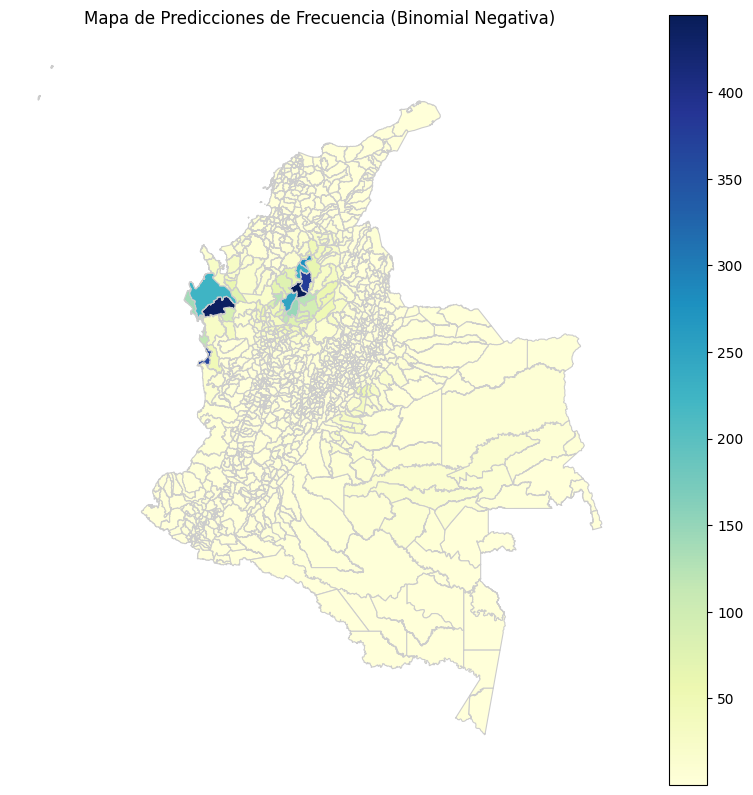

In [29]:
# Obtener las predicciones de frecuencia (ahora representan la frecuencia sin ajuste por área)
y_pred_freq_nb = negative_binomial_model.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['predicted_lands_rec_nb'] = y_pred_freq_nb

# Calcular la diferencia entre el valor real y la predicción con offset (Binomial Negativa)
gdf['difference_lands_rec_nb'] = gdf['conteo'] - gdf['predicted_lands_rec_nb']

# Graficar el mapa con los valores de predicción de frecuencia sin ajuste por área (Binomial Negativa)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_lands_rec_nb', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de Frecuencia (Binomial Negativa)')
ax.set_axis_off()
plt.show()

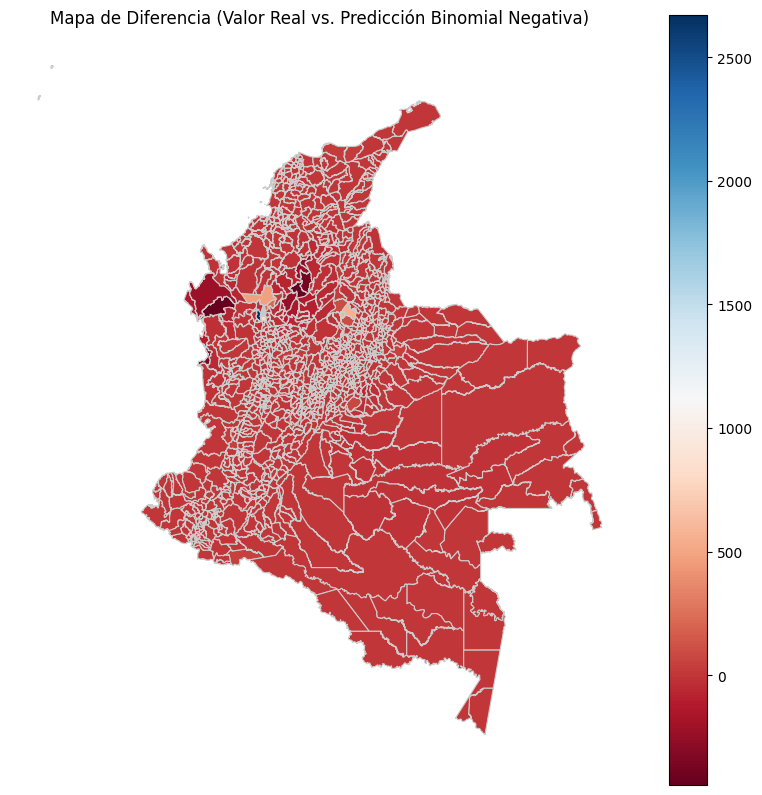

In [30]:
# Graficar el mapa con la diferencia entre el valor real y la predicción (Binomial Negativa)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_lands_rec_nb', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción Binomial Negativa)')
ax.set_axis_off()
plt.show()

# Modelos de ceros inflados

In [31]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedPoisson
from sklearn.preprocessing import StandardScaler

# Preparar datos para regresión Zero-Inflated Poisson con offset por área
y = gdf['conteo']
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean']  # No incluimos 'area' como predictor directamente ahora
#exposure = np.log(gdf['area'])  # Logaritmo del área como medida de exposición

# Escalar variables independientes (excepto el área que se usa como offset)
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión Zero-Inflated Poisson con offset
zip_model = ZeroInflatedPoisson(y, X).fit()

# Entrenar el modelo de regresión Zero-Inflated Poisson con offset
# zip_model_offset = ZeroInflatedPoisson(y, X, exposure=exposure).fit()

# Imprimir un resumen del modelo de regresión Zero-Inflated Poisson con offset
print(zip_model.summary())

Optimization terminated successfully.
         Current function value: 17.959622
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                  conteo   No. Observations:                 1121
Model:             ZeroInflatedPoisson   Df Residuals:                     1117
Method:                            MLE   Df Model:                            3
Date:                 Thu, 24 Jul 2025   Pseudo R-squ.:                  0.1817
Time:                         12:35:31   Log-Likelihood:                -20133.
converged:                        True   LL-Null:                       -24603.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     1.383

In [32]:
# AIC del modelo de regresión Zero-Inflated Poisson
zip_model.aic

np.float64(40275.47211065063)

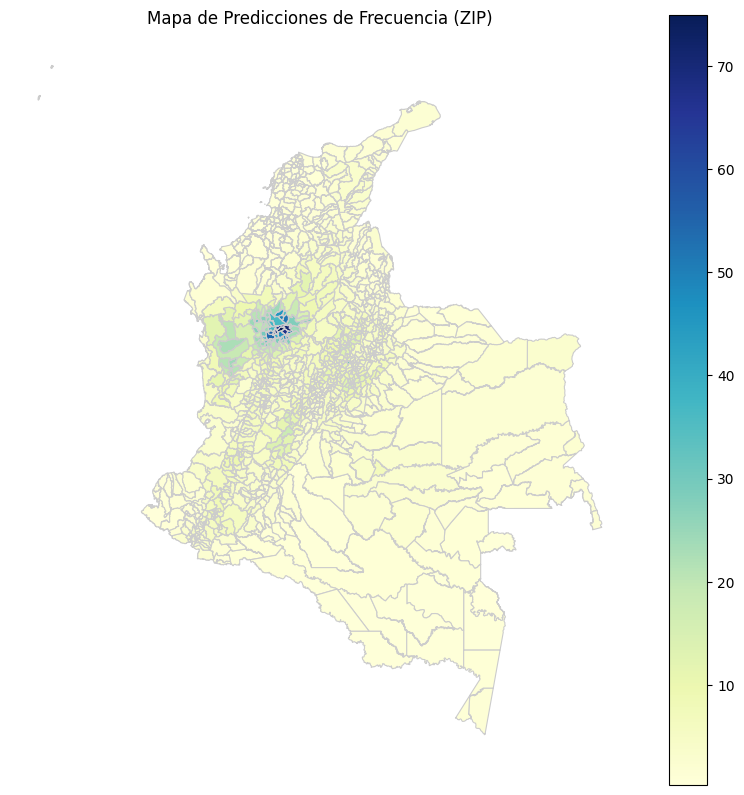

In [33]:
# Obtener las predicciones de frecuencia
y_pred_freq_zip = zip_model.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['predicted_lands_rec_zip'] = y_pred_freq_zip

# Calcular la diferencia entre el valor real y la predicción (ZIP)
gdf['difference_lands_rec_zip'] = gdf['conteo'] - gdf['predicted_lands_rec_zip']


# Graficar el mapa con los valores de predicción de frecuencia (ZIP)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_lands_rec_zip', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de Frecuencia (ZIP)')
ax.set_axis_off()
plt.show()

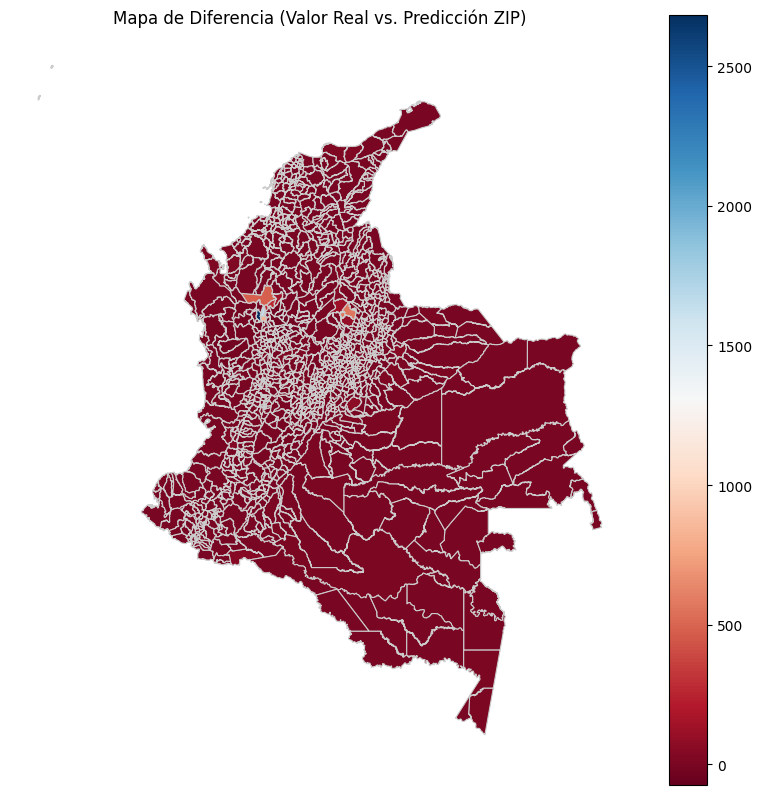

In [34]:
# Graficar el mapa con la diferencia entre el valor real y la predicción (ZIP)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_lands_rec_zip', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción ZIP)')
ax.set_axis_off()
plt.show()

In [35]:
gdf.columns

Index(['departamento', 'municipio', 'area', 'conteo', 'elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean', 'geometry', 'y_log',
       'y_pred', 'evento', 'probability_evento',
       'difference_lands_rec_logistico', 'predicted_lands_rec',
       'difference_lands_rec', 'predicted_lands_rec_nb',
       'difference_lands_rec_nb', 'predicted_lands_rec_zip',
       'difference_lands_rec_zip'],
      dtype='object')

# Patrones areales

Patrones areales de la variable respuesta y las variables predictoras significactivas según el glm (Regresión logística), usando matriz Queen

* Mapa de coropletas (Clase por cuantiles)
* Gráfico e indice de Moran
* Gráfico de LISA

In [39]:
from pysal.lib import weights
import pandas as pd
import geopandas as gpd

# Create the spatial weights matrix
w_queen = weights.Queen.from_dataframe(gdf)
w_queen

# Row standardize the matrix
w_queen.transform = 'R'

('WARNING: ', 1086, ' is an island (no neighbors)')
('WARNING: ', 1087, ' is an island (no neighbors)')


Variables modelos de regresión 

* x1 = elev_mean
* x2 = Temperatura_media_anual_mean
* x3 = Precipitacion_anual_mean
* x4 = Rango_medio_diurno_mean
* x5 = Precipitacion_mes_mas_lluvioso_mean
* x6 = Precipitacion_mes_mas_seco_mean
* x7 = Isotermalidad_mean
* x8 = Estacionalidad_de_la_temperatura_mean
* x9 = Rango_anual_de_temperatura_mean
* x10 = Estacionalidad_de_la_precipitacion_mean



#### Precipitacion_mes_mas_seco_mean (x6)

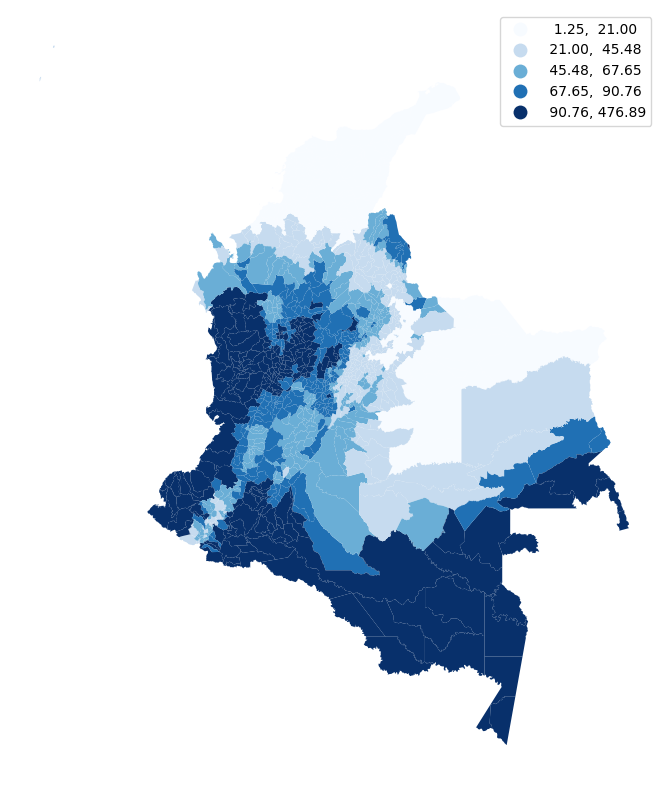

In [60]:
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='Precipitacion_mes_mas_seco_mean', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.2f}'}, cmap='Blues')
ax.set_axis_off()
plt.show()

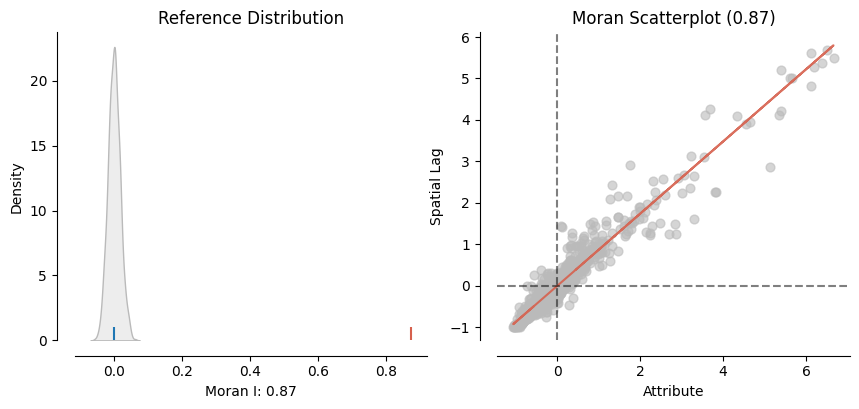

In [41]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['Precipitacion_mes_mas_seco_mean'], w_queen)
plot_moran(mi);

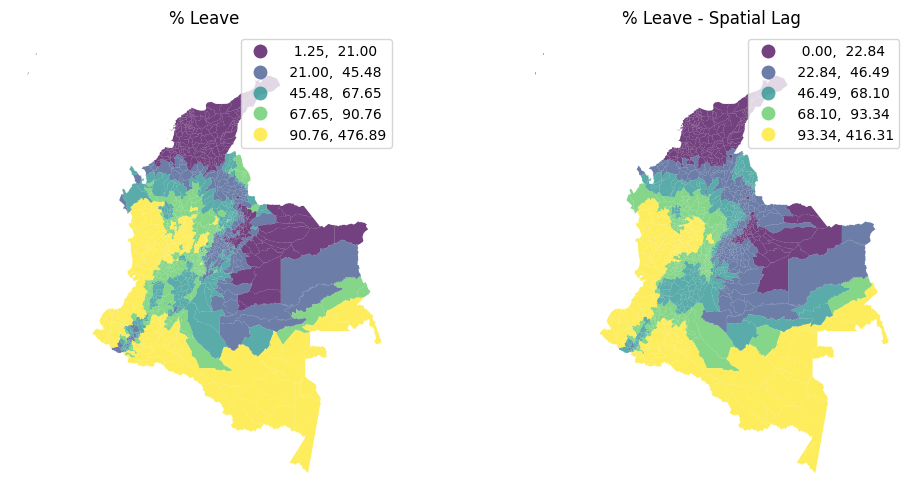

In [42]:
gdf['w_Precipitacion_mes_mas_seco_mean'] = weights.lag_spatial(w_queen, gdf['Precipitacion_mes_mas_seco_mean'])

gdf[['departamento', 'Precipitacion_mes_mas_seco_mean', 'w_Precipitacion_mes_mas_seco_mean']]

f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
gdf.plot(column='Precipitacion_mes_mas_seco_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% Leave")
gdf.plot(column='w_Precipitacion_mes_mas_seco_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
plt.show()

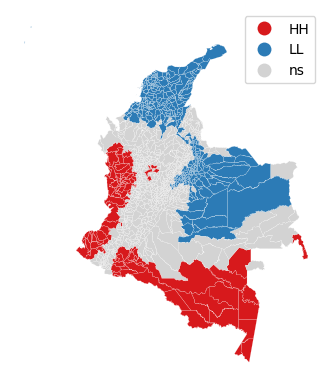

In [43]:
from splot.esda import lisa_cluster

lisa = esda.Moran_Local(gdf['Precipitacion_mes_mas_seco_mean'], w_queen)
lisa_cluster(lisa, gdf);

#### Isotermalidad_mean (x7)

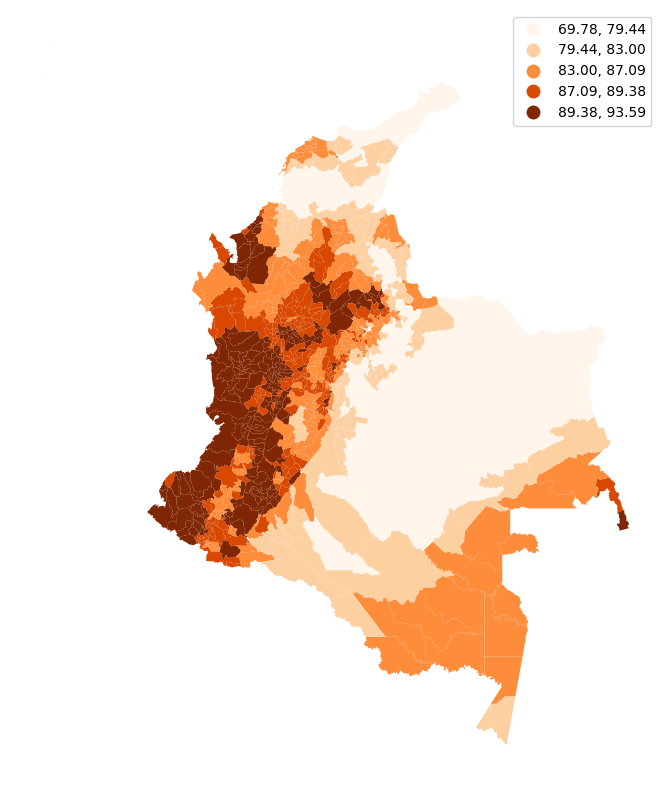

In [61]:
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='Isotermalidad_mean', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.2f}'}, cmap='Oranges')
ax.set_axis_off()
plt.show()

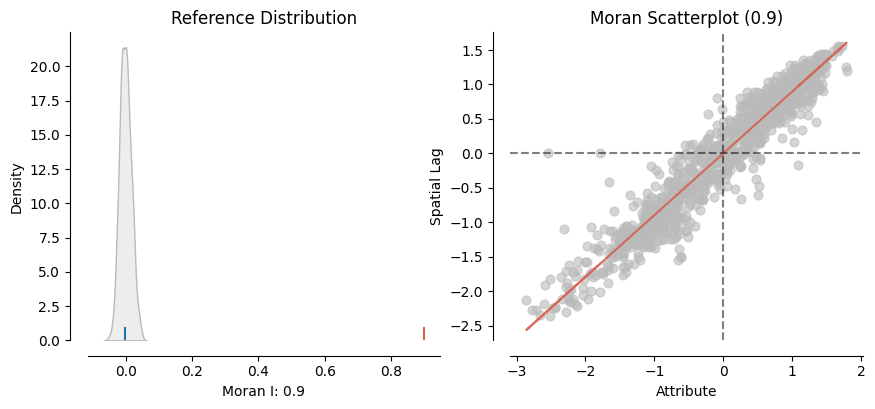

In [45]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['Isotermalidad_mean'], w_queen)
plot_moran(mi);

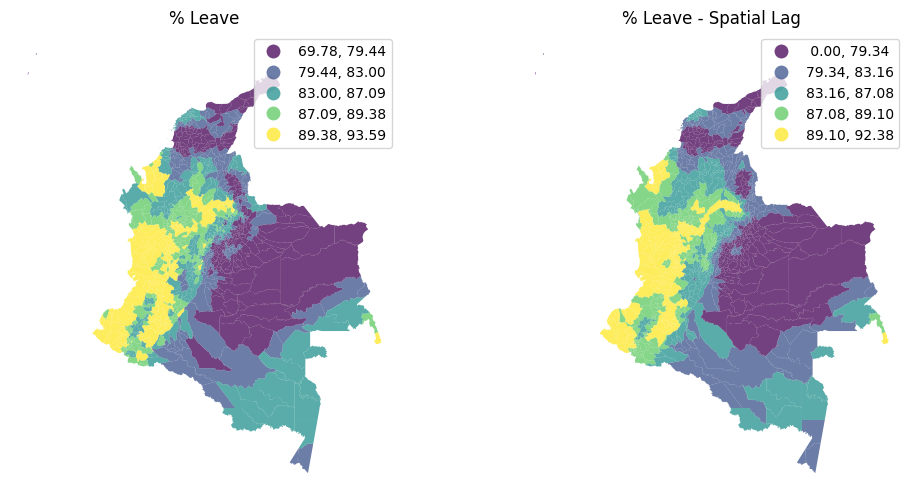

In [46]:
gdf['w_Isotermalidad_mean'] = weights.lag_spatial(w_queen, gdf['Isotermalidad_mean'])

gdf[['departamento', 'Isotermalidad_mean', 'w_Isotermalidad_mean']]

f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
gdf.plot(column='Isotermalidad_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% Leave")
gdf.plot(column='w_Isotermalidad_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
plt.show()


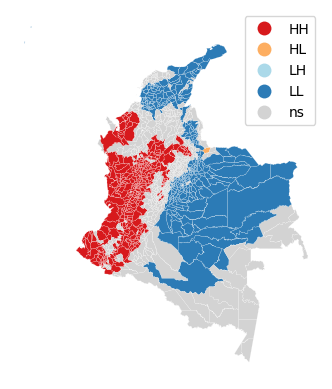

In [47]:
from splot.esda import lisa_cluster

lisa = esda.Moran_Local(gdf['Isotermalidad_mean'], w_queen)
lisa_cluster(lisa, gdf);

#### Estacionalidad_de_la_temperatura_mean (x8)

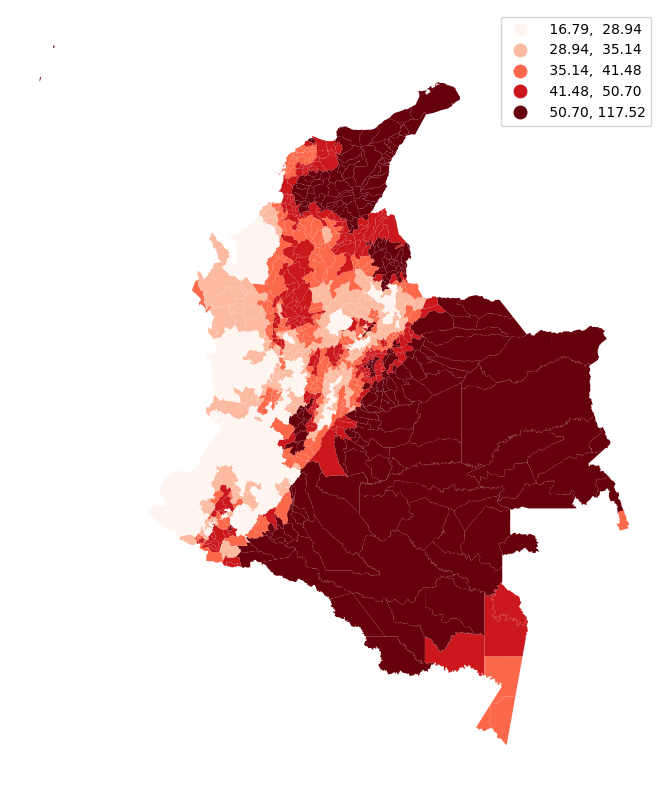

In [62]:
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='Estacionalidad_de_la_temperatura_mean', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.2f}'}, cmap='Reds')
ax.set_axis_off()
plt.show()

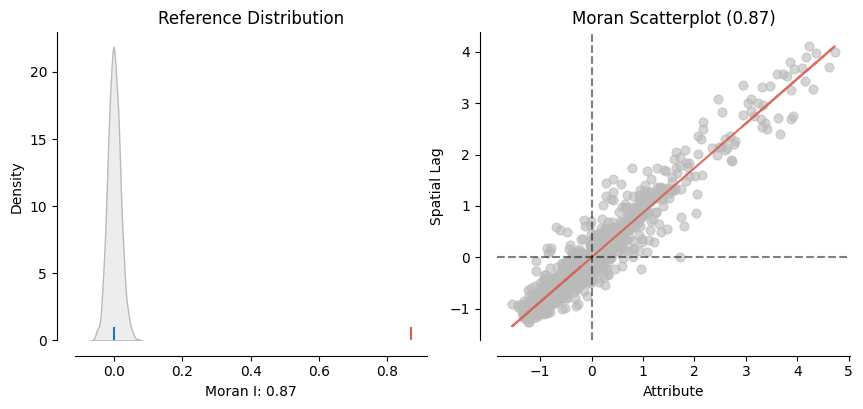

In [49]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['Estacionalidad_de_la_temperatura_mean'], w_queen)
plot_moran(mi);

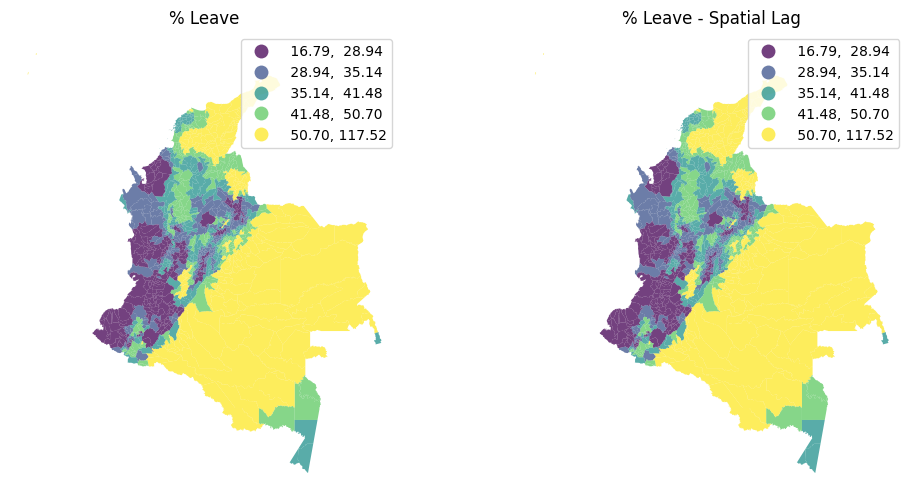

In [50]:
gdf['w_Estacionalidad_de_la_temperatura_mean'] = weights.lag_spatial(w_queen, gdf['Estacionalidad_de_la_temperatura_mean'])

gdf[['departamento', 'Estacionalidad_de_la_temperatura_mean', 'w_Estacionalidad_de_la_temperatura_mean']]

f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
gdf.plot(column='Estacionalidad_de_la_temperatura_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% Leave")
gdf.plot(column='Estacionalidad_de_la_temperatura_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
plt.show()

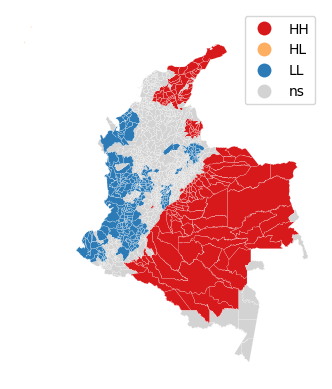

In [51]:
from splot.esda import lisa_cluster

lisa = esda.Moran_Local(gdf['Estacionalidad_de_la_temperatura_mean'], w_queen)
lisa_cluster(lisa, gdf);

#### Estacionalidad_de_la_precipitacion_mean (x10)

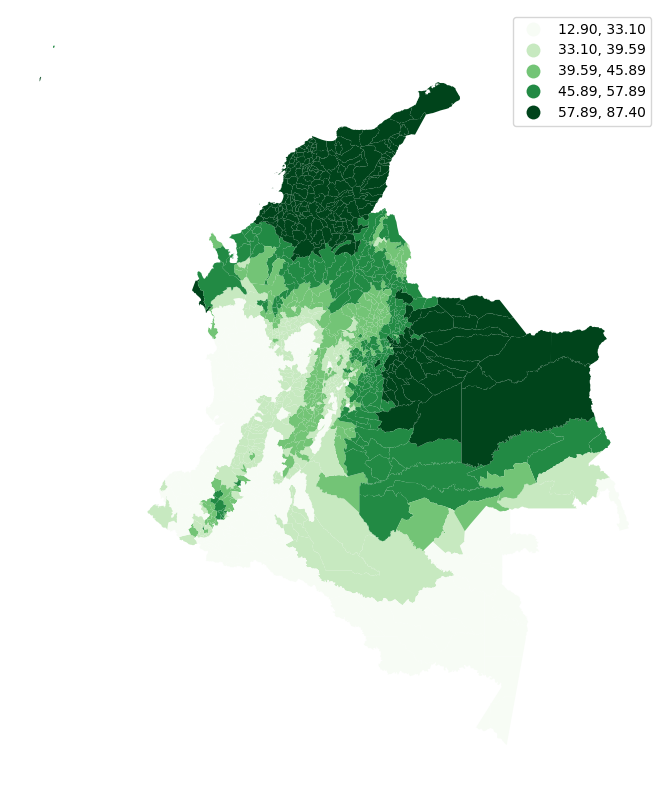

In [63]:
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='Estacionalidad_de_la_precipitacion_mean', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.2f}'}, cmap='Greens')
ax.set_axis_off()
plt.show()

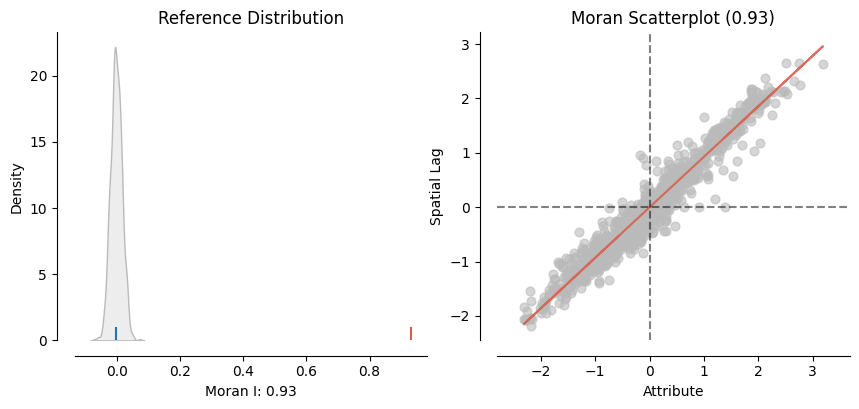

In [52]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['Estacionalidad_de_la_precipitacion_mean'], w_queen)
plot_moran(mi);

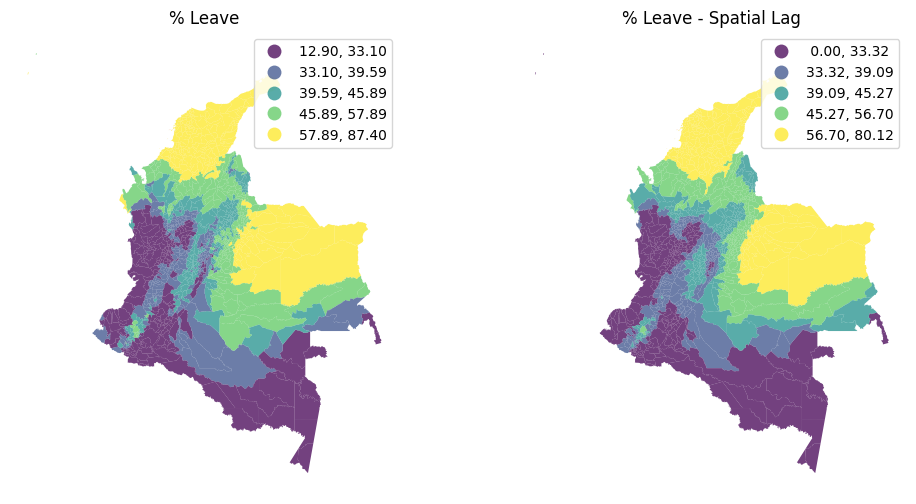

In [53]:
gdf['w_Estacionalidad_de_la_precipitacion_mean'] = weights.lag_spatial(w_queen, gdf['Estacionalidad_de_la_precipitacion_mean'])

gdf[['departamento', 'Estacionalidad_de_la_precipitacion_mean', 'w_Estacionalidad_de_la_precipitacion_mean']]

f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
gdf.plot(column='Estacionalidad_de_la_precipitacion_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% Leave")
gdf.plot(column='w_Estacionalidad_de_la_precipitacion_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
plt.show()

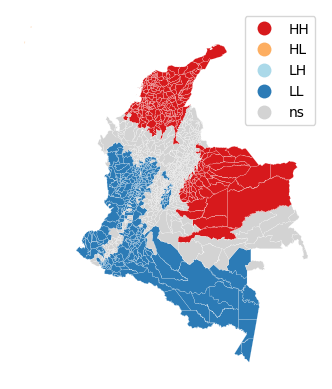

In [54]:
from splot.esda import lisa_cluster

lisa = esda.Moran_Local(gdf['Estacionalidad_de_la_precipitacion_mean'], w_queen)
lisa_cluster(lisa, gdf);

#### Variable conteo

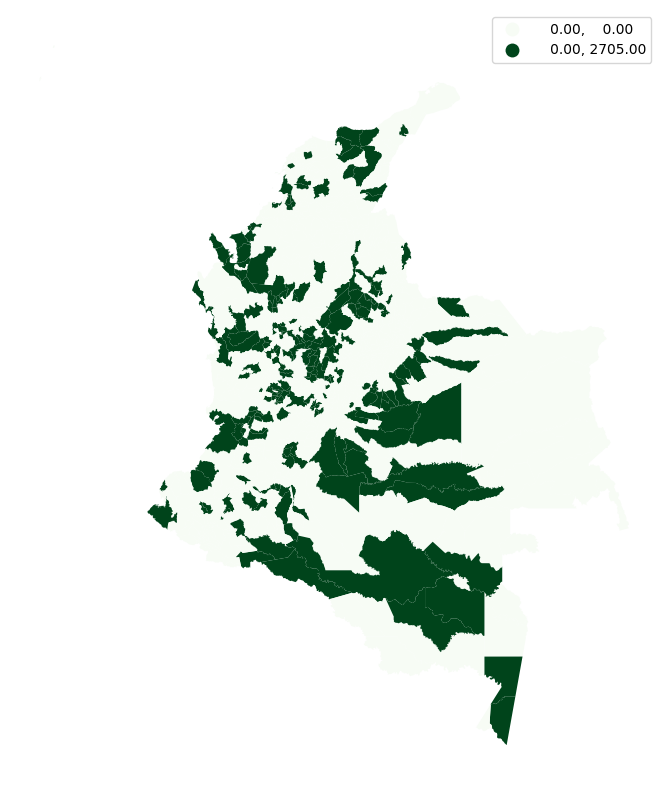

In [56]:
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='conteo', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.2f}'}, cmap='Greens')
ax.set_axis_off()
plt.show()

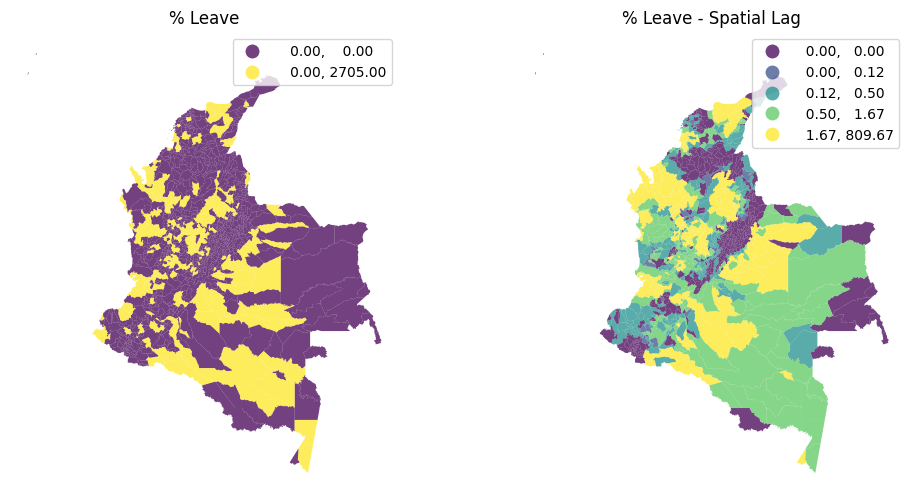

In [57]:
gdf['w_conteo'] = weights.lag_spatial(w_queen, gdf['conteo'])

gdf[['departamento', 'conteo', 'w_conteo']]

f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
gdf.plot(column='conteo', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% Leave")
gdf.plot(column='w_conteo', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
plt.show()

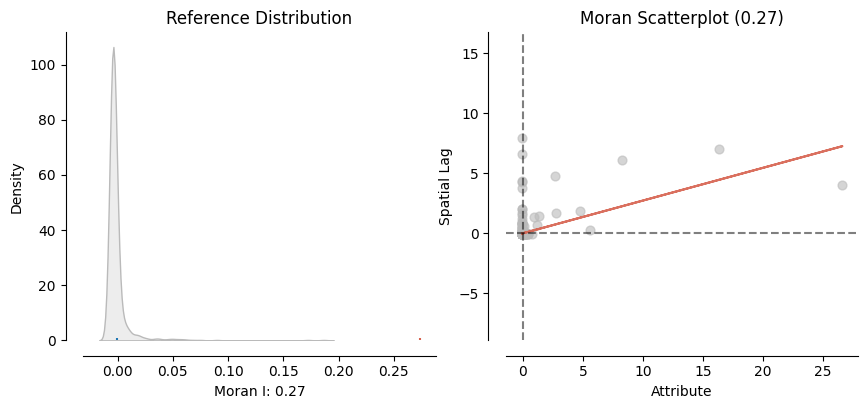

In [58]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['conteo'], w_queen)
plot_moran(mi);

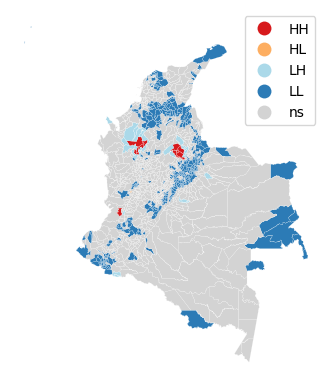

In [59]:
from splot.esda import lisa_cluster

lisa = esda.Moran_Local(gdf['conteo'], w_queen)
lisa_cluster(lisa, gdf);

### Ejemplo. MATRIZ DE PESOS BASADA EN LOS K-VECINOS MÁS CERCANOS

In [53]:
#Matriz de pesos basada en los 4 vecinos más cercanos
from pysal.lib import weights

w_k4 = weights.distance.KNN.from_dataframe(gdf, k=4)

# Row standardize the matrix
w_k4.transform = 'R'

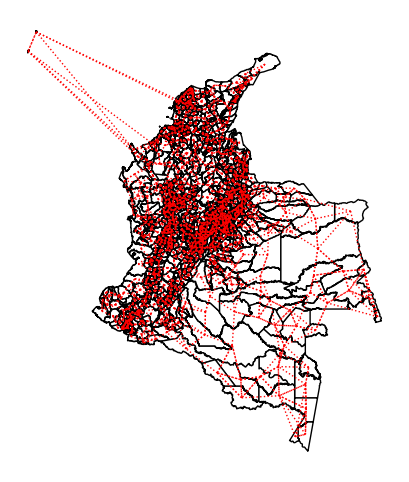

In [54]:
f, axs = plt.subplots(figsize=(6,6))
ax = gdf.plot(edgecolor="k", facecolor="w", ax=axs)
w_k4.plot(gdf,ax=axs,edge_kws=dict(color="r", linestyle=":", linewidth=1),node_kws=dict(marker=""),)
axs.set_axis_off()

* Evaluación de "conteo" con matriz de pesos de 4-vecinos más cercanos

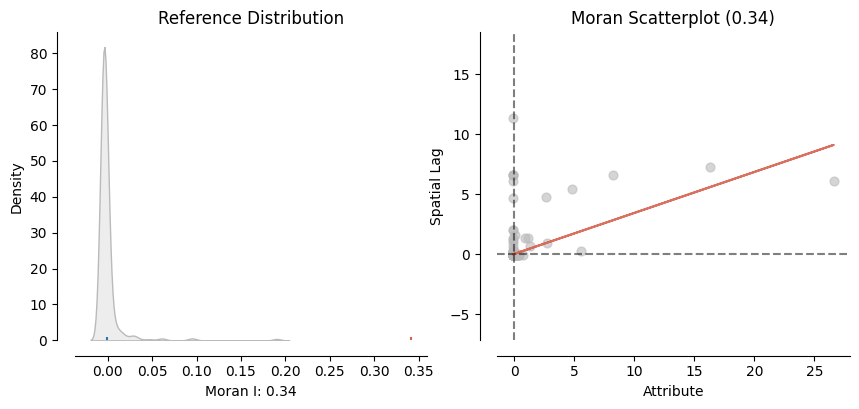

In [56]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['conteo'], w_k4)
plot_moran(mi);

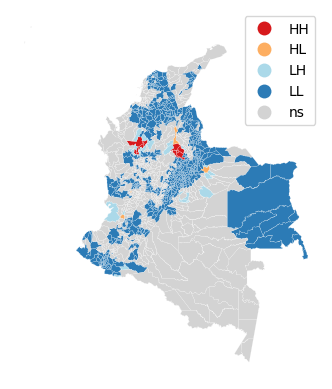

In [57]:
from splot.esda import lisa_cluster

lisa = esda.Moran_Local(gdf['conteo'], w_k4)
lisa_cluster(lisa, gdf);

* Evaluación de la precipitación del mes más seco con matriz de pesos de 4-vecinos más cercanos

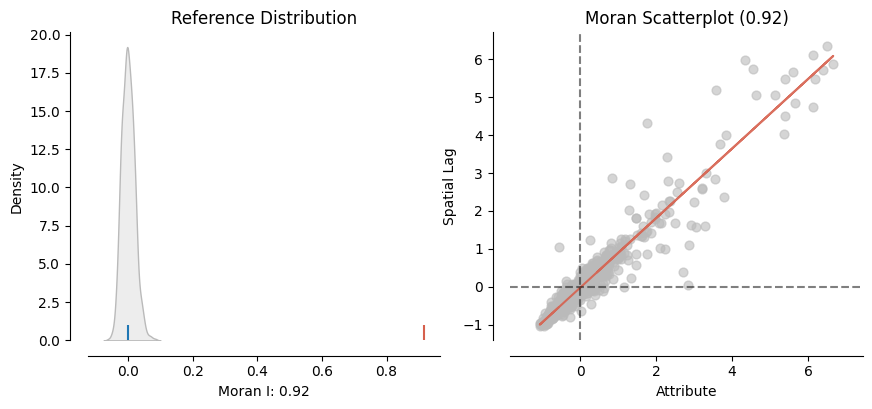

In [58]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['Precipitacion_mes_mas_seco_mean'], w_k4)
plot_moran(mi);

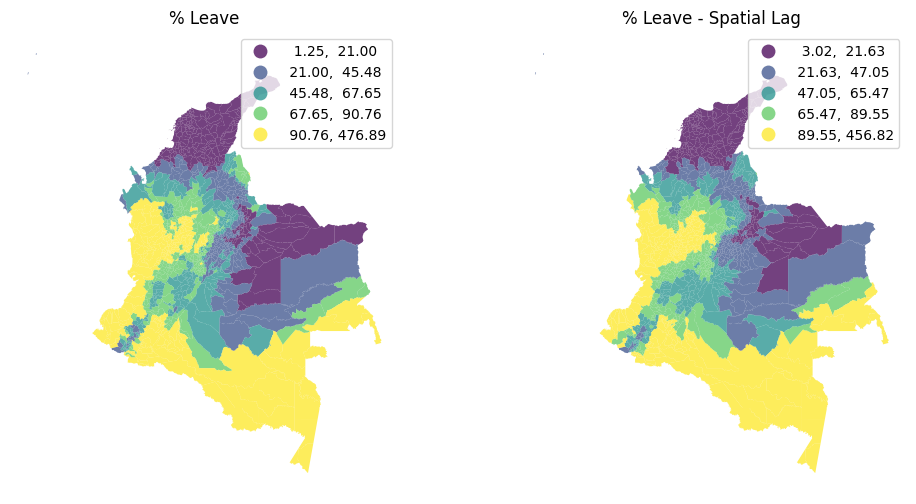

In [59]:
gdf['w_Precipitacion_mes_mas_seco_mean'] = weights.lag_spatial(w_k4, gdf['Precipitacion_mes_mas_seco_mean'])

gdf[['departamento', 'Precipitacion_mes_mas_seco_mean', 'w_Precipitacion_mes_mas_seco_mean']]

f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
gdf.plot(column='Precipitacion_mes_mas_seco_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% Leave")
gdf.plot(column='w_Precipitacion_mes_mas_seco_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
plt.show()

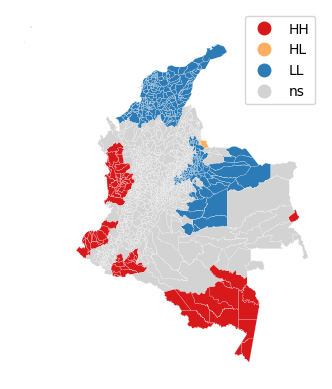

In [60]:
from splot.esda import lisa_cluster

lisa = esda.Moran_Local(gdf['Precipitacion_mes_mas_seco_mean'], w_k4)
lisa_cluster(lisa, gdf);